In [117]:
%%HTML
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>

### Library

In [118]:
from datetime import datetime, timedelta
import oandapy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pickle
from config import token
import talib

### Oandaのインスタンス化

In [2]:
access_token = token
oanda = oandapy.API(environment="practice", access_token=access_token)

### 過去データの取得

In [3]:
#取得したい日付
end = datetime(2018, 8, 1, 0, 0)
start = end - timedelta(days = 4999)

end_day =  '{0}-{1:02d}-{2:02d}-{3:02d}:{4:02d}:{5:02d}'.format(end.year, end.month, end.day, end.hour, end.minute, end.second)
start_day =  '{0}-{1:02d}-{2:02d}-{3:02d}:{4:02d}:{5:02d}'.format(start.year, start.month, start.day, start.hour, start.minute, start.second)

res = oanda.get_history(instrument="USD_JPY",granularity="D",start = start_day, end = end_day)

In [4]:
df = pd.DataFrame(res['candles'])
df = df.drop(['complete'], axis = 1)

df['time'] = df['time'].str[:-8]
df['time'] = df['time'].str.replace('T',' ')
times = [datetime.strptime(v, '%Y-%m-%d %H:%M:%S') for v in df['time']]
df['time'] = times
df = df.set_index('time',drop = True)

### データをohlcvの形に変換

In [14]:
arr_ask = np.array(df.drop(['closeBid', 'highBid', 'lowBid', 'openBid'], axis = 1))
arr_bid = np.array(df.drop(['closeAsk', 'highAsk', 'lowAsk', 'openAsk'], axis = 1))

### 移動平均

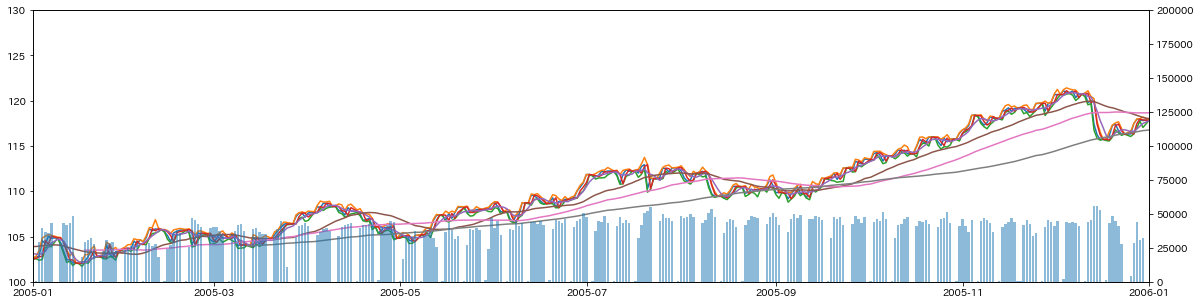

In [79]:
fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(df.index, arr_ask[:,0:4])
ax1.plot(df.index, talib.SMA(arr_ask[:,0], timeperiod = 5))
ax1.plot(df.index, talib.SMA(arr_ask[:,0], timeperiod = 25))
ax1.plot(df.index, talib.SMA(arr_ask[:,0], timeperiod = 50))
ax1.plot(df.index, talib.SMA(arr_ask[:,0], timeperiod = 100))
ax1.set_ylim([100,130])
ax2 = ax1.twinx()
ax2.bar(df.index, arr_ask[:,4], alpha = 0.5)
ax2.set_ylim([0,200000])
plt.xlim(['2005-01-01','2006-01-01'])
plt.show()

### MACD

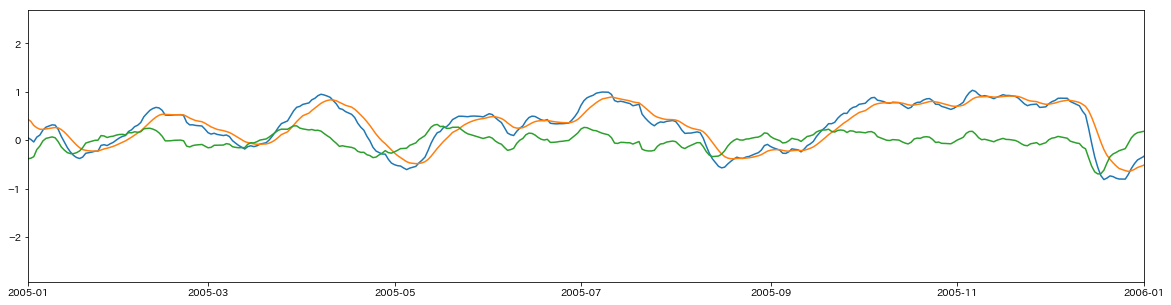

In [74]:
plt.figure(figsize = (20,5))
plt.plot(df.index, talib.MACD(arr_ask[:,0])[0])
plt.plot(df.index, talib.MACD(arr_ask[:,0])[1])
plt.plot(df.index, talib.MACD(arr_ask[:,0])[2])
plt.xlim(['2005-01-01','2006-01-01'])
plt.show()

### RSI

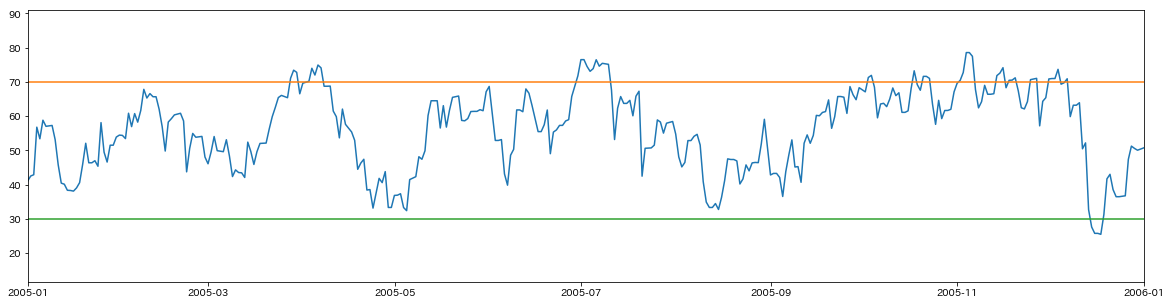

In [96]:
plt.figure(figsize = (20,5))
plt.plot(df.index, talib.RSI(arr_ask[:,0], timeperiod = 14))
plt.plot(df.index, np.ones(len(df))*70)
plt.plot(df.index, np.ones(len(df))*30)
plt.xlim(['2005-01-01','2006-01-01'])
plt.show()

### ボリンジャーバンド

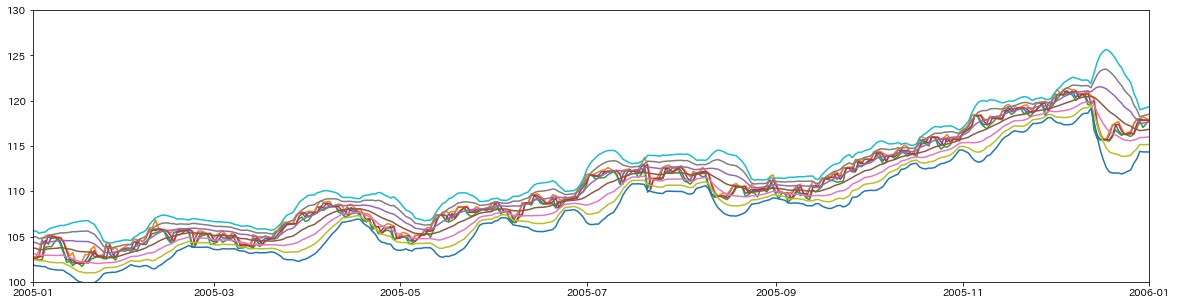

In [113]:
plt.figure(figsize = (20,5))
plt.plot(df.index, arr_ask[:,0:4])
plt.plot(df.index, talib.BBANDS(arr_ask[:,0], timeperiod=15, nbdevup=1, nbdevdn=1)[0])
plt.plot(df.index, talib.BBANDS(arr_ask[:,0], timeperiod=15, nbdevup=1, nbdevdn=1)[1])
plt.plot(df.index, talib.BBANDS(arr_ask[:,0], timeperiod=15, nbdevup=1, nbdevdn=1)[2])
plt.plot(df.index, talib.BBANDS(arr_ask[:,0], timeperiod=15, nbdevup=2, nbdevdn=2)[0])
plt.plot(df.index, talib.BBANDS(arr_ask[:,0], timeperiod=15, nbdevup=2, nbdevdn=2)[2])
plt.plot(df.index, talib.BBANDS(arr_ask[:,0], timeperiod=15, nbdevup=3, nbdevdn=3)[0])
plt.plot(df.index, talib.BBANDS(arr_ask[:,0], timeperiod=15, nbdevup=3, nbdevdn=3)[2])
plt.xlim(['2005-01-01','2006-01-01'])
plt.ylim([100,130])
plt.show()

### ADX, DI+, DI-

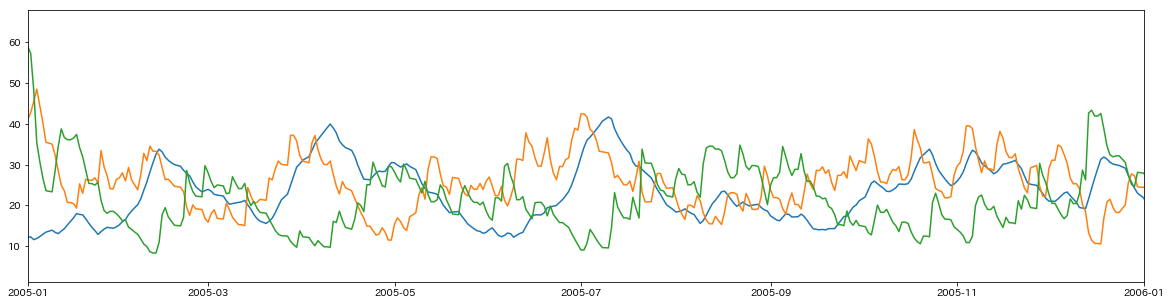

In [131]:
plt.figure(figsize = (20,5))
plt.plot(df.index, talib.ADX(arr_ask[:,1],arr_ask[:,2],arr_ask[:,0], timeperiod =14))
plt.plot(df.index, talib.PLUS_DI(arr_ask[:,1],arr_ask[:,2],arr_ask[:,0], timeperiod = 14))
plt.plot(df.index, talib.MINUS_DI(arr_ask[:,1],arr_ask[:,2],arr_ask[:,0], timeperiod = 14))
plt.xlim(['2005-01-01','2006-01-01'])
plt.show()

### SAR

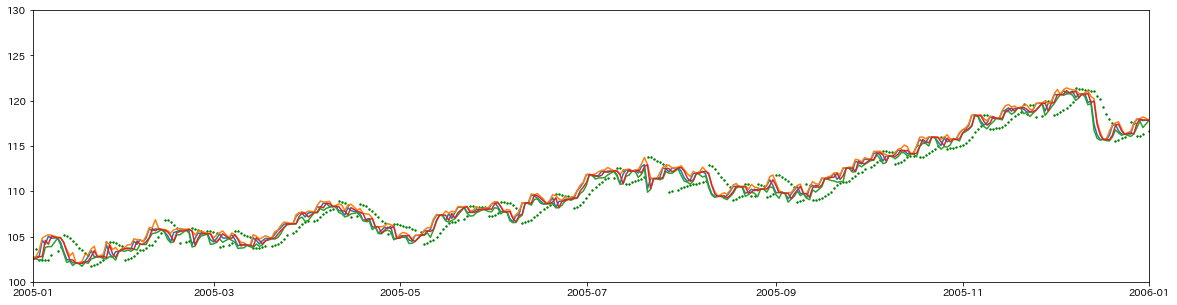

In [160]:
plt.figure(figsize = (20,5))
plt.plot(df.index, arr_ask[:,:4])
plt.scatter(df.index, talib.SAR(arr_ask[:,1],arr_ask[:,2], acceleration=0.05, maximum=0.2), s = 2, c = 'g')
plt.xlim(['2005-01-01','2006-01-01'])
plt.ylim([100,130])
plt.show()